In [ ]:
pip install networkx


In [3]:
import networkx as nx


In [ ]:
g1 = nx.Graph()
g2 = nx.DiGraph()
g3 = nx.MultiGraph()
g4 = nx.MultiDiGraph()

In [20]:
g1.add_node(1)
print(g1)
g1.add_nodes_from([2,3,4,5])
print(g1)


Graph with 5 nodes and 0 edges
Graph with 5 nodes and 0 edges


In [24]:
g1.add_edge(6,7)
g1.add_edge(1,2)
print(g1)

Graph with 7 nodes and 2 edges


In [30]:
g1.add_edges_from([(2,3),(4,5),(3,4)])
print(g1)

Graph with 7 nodes and 7 edges


In [32]:
g1.add_edge(4,5,weight=2)
g1.add_edge(5,6,friends = True)
g1.add_edge(7,1,weight=5,friends=False)
print(g1)

Graph with 7 nodes and 7 edges


In [36]:
print(g1[1])
print(g1[7][1])


{2: {}, 7: {'weight': 5, 'friends': False}}
{'weight': 5, 'friends': False}


In [38]:
print(g1.nodes)
print(g1.edges)

[1, 2, 3, 4, 5, 6, 7]
[(1, 2), (1, 7), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]


In [40]:
print(g1.edges.data())

[(1, 2, {}), (1, 7, {'weight': 5, 'friends': False}), (2, 3, {}), (3, 4, {}), (4, 5, {'weight': 2}), (5, 6, {'friends': True}), (6, 7, {})]


In [42]:
print(g1.edges.data("weight"))

[(1, 2, None), (1, 7, 5), (2, 3, None), (3, 4, None), (4, 5, 2), (5, 6, None), (6, 7, None)]


In [46]:
print(g1.edges[7,1]["weight"])

5


In [ ]:
g1.remove_node(3)
print(g1)


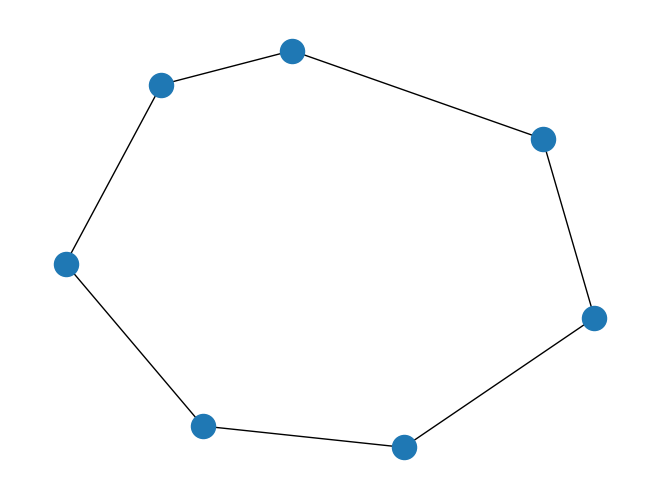

In [48]:
nx.draw(g1)

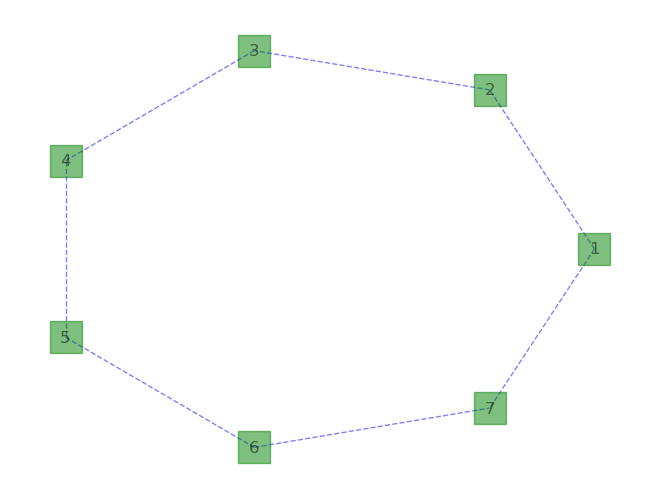

In [56]:
nx.draw(g1,pos=nx.circular_layout(g1), node_color = "g", edge_color='b', with_labels=True,node_size=500,node_shape='s',alpha=0.5,style='--' )